In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
import re
import gc 
from tqdm import tqdm
from datetime import date     #calculating age
from datetime import datetime #converting string to date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , f1_score , make_scorer
from sklearn.preprocessing import StandardScaler,OneHotEncoder , LabelEncoder ,normalize
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# Any results you write to the current directory are saved as output.

# 1. Reading Dataset

In [2]:
df1 = pd.read_csv("../input/train.csv")
df2 = pd.read_csv("../input/test_bqCt9Pv.csv")
#df1 = dff.drop('loan_default' , axis=1)
#df = pd.concat([df1,df2], axis=0 , sort=True)

# 2. Data Analysis

In [3]:
df1.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
#df.drop(['UniqueID'] , inplace=True , axis=1)

In [5]:
df1.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [6]:
df1.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

> **Only One column has Null VALUES : EMPLOYMENT TYPES**

In [7]:
df1['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

> Filling NaN values with most frequent value.

In [8]:
df1 = df1.fillna(df1.mode().iloc[0])
df2 = df2.fillna(df2.mode().iloc[0])

In [9]:
df1.shape

(233154, 41)

# 3. Data Preprocessing

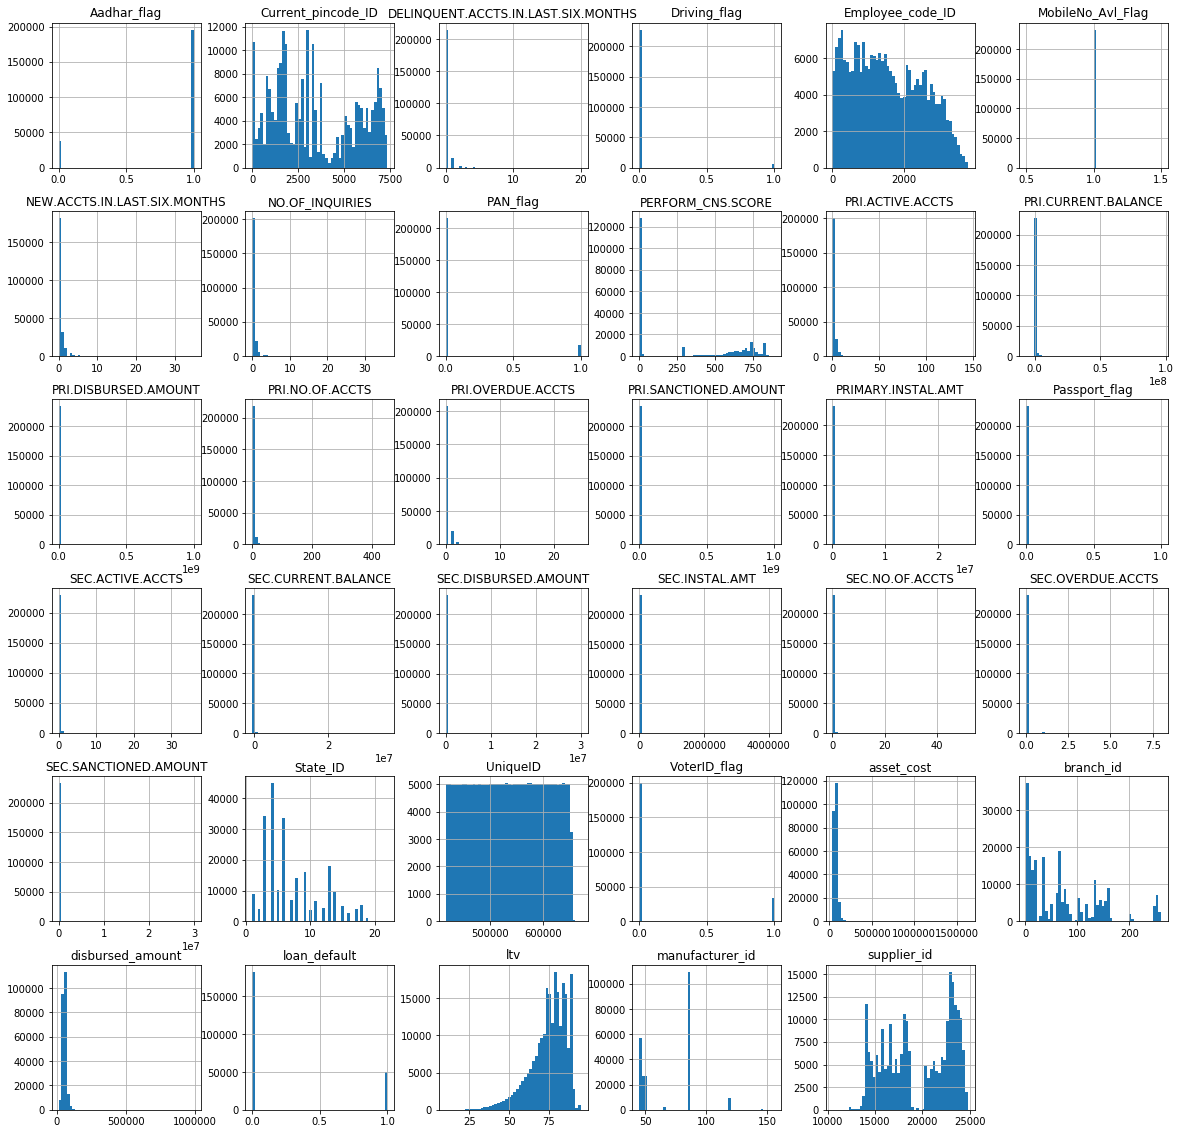

In [10]:
#Plotting Histogram    
df1.hist(bins=50 , figsize=(20,20))
plt.show()

### Standardising the data

In [11]:
# Checking on Categorical data
for col in tqdm(df1.columns):
    if df1[col].dtype == 'object':
        print(col , ":", df1[col].nunique())

100%|██████████| 41/41 [00:00<00:00, 553.98it/s]

Date.of.Birth : 15433
Employment.Type : 2
DisbursalDate : 84
PERFORM_CNS.SCORE.DESCRIPTION : 20
AVERAGE.ACCT.AGE : 192
CREDIT.HISTORY.LENGTH : 294


### Helper Functions

> We will perform the following things:

* As we can see the categorical feature like **CREDIT.HISTORY.LENGTH , AVEGRAGE.ACC.AGE , DISBURSALDATE** have a large number of categories. We decide to drop them from our raw dataset. 

* The feature **PERFORM_CNS.SCORE.DESCRIPTION** can be reduced by following command.

* Convert DOB of customers into their Age

* [](http://)Converting Categorical Data into OneHot encoded features

In [12]:
# CODE FOR AGE CONVERSION: https://www.geeksforgeeks.org/python-program-to-calculate-age-in-year/
def calcAge(born):
    born = datetime.strptime(born , '%d-%m-%y')
    today= date.today()
    age = today.year- born.year - ((today.month,today.day) < (born.month,born.day))
    return age

In [13]:
#1
df1.drop(['DisbursalDate' , 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'], inplace=True , axis=1)
df2.drop(['DisbursalDate' , 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'], inplace=True , axis=1)
#2
df1['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['Not Scored: More than 50 active Accounts found', 
                                                         'Not Scored: No Activity seen on the customer (Inactive)',
                                                         'Not Scored: No Updates available in last 36 months',
                                                         'Not Enough Info available on the customer','Not Scored: Only a Guarantor',
                                                         'Not Scored: Sufficient History Not Available',
                                                         'Not Scored: Not Enough Info available on the customer'], 
                                                   value= 'Not Scored', inplace = True)
df2['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['Not Scored: More than 50 active Accounts found', 
                                                         'Not Scored: No Activity seen on the customer (Inactive)',
                                                         'Not Scored: No Updates available in last 36 months',
                                                         'Not Enough Info available on the customer','Not Scored: Only a Guarantor',
                                                         'Not Scored: Sufficient History Not Available',
                                                         'Not Scored: Not Enough Info available on the customer'], 
                                                   value= 'Not Scored', inplace = True)

#3 
dob = df1['Date.of.Birth']
df1['Age'] = dob.map(calcAge)
df1.drop(['Date.of.Birth'] , axis=1 , inplace=True)

dob = df2['Date.of.Birth']
df2['Age'] = dob.map(calcAge)
df2.drop(['Date.of.Birth'] , axis=1 , inplace=True)

In [14]:
df1.shape , df2.shape

((233154, 38), (112392, 37))

> As we can see there are lot of Outliers in our data which we will remove using ***INTERQUARTILE RANGE(IQR)*** 

* See here the code snippet from <https://www.kaggle.com/matthieu64/car-loan-default-prediction/notebook#Feature-Engineering>

In [15]:
def removeOutlier(df, cols):
    indexes=[]
    for col in tqdm(cols):
        if (df[col].dtypes !='object'):
            Q1 = df[col].quantile(q=0.001)
            Q3 = df[col].quantile(q=0.999)        
            for i in (df.index):
                if ((df.loc[i,col]< Q1/5) or (df.loc[i,col] > 5*Q3)):
                    df = df.drop(index=i)
                    indexes.append(i)
    return df, indexes

In [16]:
cols_with_outliers=['disbursed_amount', 'asset_cost', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS','SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES','Employment.Type', 'PERFORM_CNS.SCORE.DESCRIPTION']

new_df1, indexex = removeOutlier(df1 , cols_with_outliers)
new_df2, indexex2 = removeOutlier(df2 , cols_with_outliers)

100%|██████████| 21/21 [00:50<00:00,  2.43s/it]


In [17]:
new_df1.shape,new_df2.shape

((232669, 38), (112146, 37))

## **Dummy Variables**
>  Creating Dummy Variables

In [18]:
cat_data= df1.select_dtypes(include='object').columns
#6
df = pd.get_dummies(new_df1[cat_data])
dff = pd.get_dummies(new_df2[cat_data])
print("The shape of dummy variables : " , df.shape)
print("The shape of dummy variables : " , dff.shape)

The shape of dummy variables :  (232669, 17)
The shape of dummy variables :  (112146, 17)


### Standardising the data

In [19]:
num_data = list(new_df1._get_numeric_data().columns)
num_data.remove('loan_default')
scaler = StandardScaler()
scaler.fit(new_df1[num_data])
normalized = scaler.transform(new_df1[num_data])
normalized2 = scaler.transform(new_df2[num_data])
normalized = pd.DataFrame(normalized , columns=num_data)
normalized2 = pd.DataFrame(normalized2 , columns=num_data)
print("The shape of normalised numerical data : " , normalized.shape)
print("The shape of normalised numerical data : " , normalized2.shape)

The shape of normalised numerical data :  (232669, 35)
The shape of normalised numerical data :  (112146, 35)


## **The final data**
> THE FINAL DATA AFTER ALL THE PREPROCESSING

In [20]:
final_df = pd.concat([normalized , df], sort=True , axis=1)
test_df = pd.concat([normalized2 , dff], sort=True , axis=1)
final_df= final_df.dropna(axis=0)
test_df = test_df.dropna(axis=0)
print("The shape of the final data:" , final_df.shape)
print("The shape of the final data:" , test_df.shape)

The shape of the final data: (232184, 52)
The shape of the final data: (111900, 52)


# Feature Selection

In [21]:
# Finding Correlation between features
def correlation(df ,column):
    column = column.iloc[df.index]
    dff= df.join(column)
    corr_max = dff.corr()  #create correlation matrix
    top_15 = corr_max.nlargest(20 , 'loan_default')['loan_default'].index # select top 15 correlate features
    corr = np.corrcoef(dff[top_15].values.T)    
    return corr , top_15

#Plot correlation map
def plot_heatmap(corr,top_15):
    plt.figure(figsize=(15,10))
    sns.heatmap(corr, cbar=True , annot=True , fmt='.2f', yticklabels=top_15.values , xticklabels=top_15.values)
    plt.title('CORRELATION MATRIX')
    plt.show()
    

In [22]:
corr , top_15 = correlation(final_df, df1['loan_default'])
print("The top 15 feature correlated to target variable", top_15)

The top 15 feature correlated to target variable Index(['loan_default', 'PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available',
       'PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk',
       'Employment.Type_Self employed',
       'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium Risk', 'Employee_code_ID',
       'State_ID', 'branch_id', 'VoterID_flag', 'supplier_id',
       'PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_H-Medium Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_J-High Risk', 'Current_pincode_ID',
       'asset_cost', 'disbursed_amount', 'UniqueID', 'SEC.ACTIVE.ACCTS',
       'SEC.NO.OF.ACCTS'],
      dtype='object')


# **Model**

In [23]:
# def LogReg(X, y):
#     kwargs ={
#         'class_weight':None,
#         'fit_intercept':True,
#         'max_iter':1000
#     }
    
#     param_grid =[{ 'C': np.random.rand(5) , 
#                  'solver': ['liblinear'],
#                  'penalty':['l1']
#                  },
#                 { 'C': np.random.rand(5) , 
#                  'solver': ['lbfgs'],
#                  'penalty':['l2']
#                  }]
#     scoring = {'accuracy': make_scorer(accuracy_score) , 
#                'f1': make_scorer(f1_score)}
    
#     X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.3 , random_state=0)
#     lr = LogisticRegression(**kwargs)
#     model =GridSearchCV(lr , param_grid=param_grid , scoring=scoring , cv=5 , refit=False , verbose=10)
#     model.fit(X_train,y_train)
#     print(model.best_params_)
#     print(model.score(X_test , y_test))

In [24]:
X = final_df
y = new_df1['loan_default'].iloc[final_df.index]
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.3 , random_state=0)
c= [0.001 ,0.0001,0.01,1,10]

In [25]:
scores=[]
for i in (c):
    lr = LogisticRegression(penalty='l1' , solver='liblinear' , max_iter=1000 , C=i)
    top15= list(top_15)
    top15.remove('loan_default')
    lr.fit(X_train[top15],y_train)
    scores.append(lr.score(X_test[top15],y_test))
print("The score for C= {} is {}".format(scores.index(max(scores)),max(scores)))

The score for C= 1 is 0.7811387389456759


In [26]:
for i in (c):
    lr = LogisticRegression(penalty='l2' , solver='lbfgs' , max_iter=1000 , C=i)
    top15= list(top_15)
    top15.remove('loan_default')
    lr.fit(X_train[top15],y_train)
    scores.append(lr.score(X_test[top15],y_test))
print("The score for C= {} is {}".format(scores.index(max(scores)),max(scores)))

The score for C= 1 is 0.7811387389456759


In [27]:
model = LogisticRegression(penalty='l2' , solver='lbfgs' , C=1 ,max_iter=1000 )
model.fit(X,y)
predictions = model.predict(test_df)

In [28]:
predictions

array([0, 0, 0, ..., 0, 0, 0])